In [1]:
%matplotlib inline
import pandas as pd
import dataset

In [9]:
node_id = '001e0610bbf9'

dates = [
    '2017-10-05',
    '2017-10-06',
    '2017-10-07',
    '2017-10-08',
    '2017-10-09',
    '2017-10-10',
    '2017-10-11',
]

urlfmt = 'http://beehive1.mcs.anl.gov/datasets/2/{node_id}/{date}.csv.gz'

df = dataset.load_datasets([urlfmt.format(node_id=node_id, date=date) for date in dates])
df.head()

,APDS-9006-020.intensity,BMP180.pressure,BMP180.temperature,HIH4030.humidity,HIH6130.humidity,HIH6130.temperature,HMC5883L.magnetic_field.x,HMC5883L.magnetic_field.y,HMC5883L.magnetic_field.z,HTU21D.humidity,...,MMA8452Q.acceleration.z,MMA8452Q.rms,PR103J2.temperature,SPV1840LR5H-B.intensity,TMP112.temperature,TMP421.temperature,TSL250RD-AS.intensity,TSL250RD-LS.intensity,TSL260RD.intensity,TSYS01.temperature
2017-10-05 00:00:14,5.0,99896.0,26.45,406.0,31.27,45.08,-0.190,0.643,0.138,38.97,...,-1.03,1.03,859.0,823.0,26.81,41.12,0.0,32.0,39.0,27.14
2017-10-05 00:00:38,5.0,99895.0,26.50,423.0,31.27,45.08,-0.191,0.644,0.137,38.84,...,-1.03,1.03,859.0,823.0,26.81,41.12,0.0,32.0,39.0,27.18
2017-10-05 00:01:02,5.0,99896.0,26.45,424.0,31.27,45.08,-0.194,0.638,0.137,38.81,...,-1.02,1.02,857.0,823.0,26.81,41.12,0.0,32.0,39.0,27.19
2017-10-05 00:01:26,5.0,99893.0,26.40,422.0,31.27,45.07,-0.189,0.645,0.138,38.87,...,-1.03,1.03,856.0,823.0,26.81,41.12,0.0,32.0,39.0,27.17
2017-10-05 00:01:50,5.0,99894.0,26.40,423.0,31.26,45.07,-0.191,0.641,0.139,38.89,...,-1.03,1.03,858.0,823.0,26.81,41.12,0.0,32.0,39.0,27.16


In [20]:
def show_plots(df):
    figsize = (16, 9)

    columns = [c for c in df.columns if 'temperature' in c.lower() and 'PR' not in c]
    df[columns].plot(figsize=figsize, title='Temperature')

    columns = [c for c in df.columns if 'humidity' in c]
    df[columns].plot(figsize=figsize, title='Humidity')
    
    columns = [c for c in df.columns if 'pressure' in c]
    df[columns].plot(figsize=figsize, title='Pressure')
    
    columns = [c for c in df.columns if 'intensity' in c.lower() and 'MLX' not in c and 'SPV' not in c and 'ML85' not in c]
    df[columns].plot(figsize=figsize, title='Intensity')
    
    columns = [c for c in df.columns if 'MMA8452Q' in c]
    df[columns].plot(figsize=figsize, title='Acceleration')
    
    columns = [c for c in df.columns if 'HMC5883L' in c]
    df[columns].plot(figsize=figsize, title='Magnetic Field')

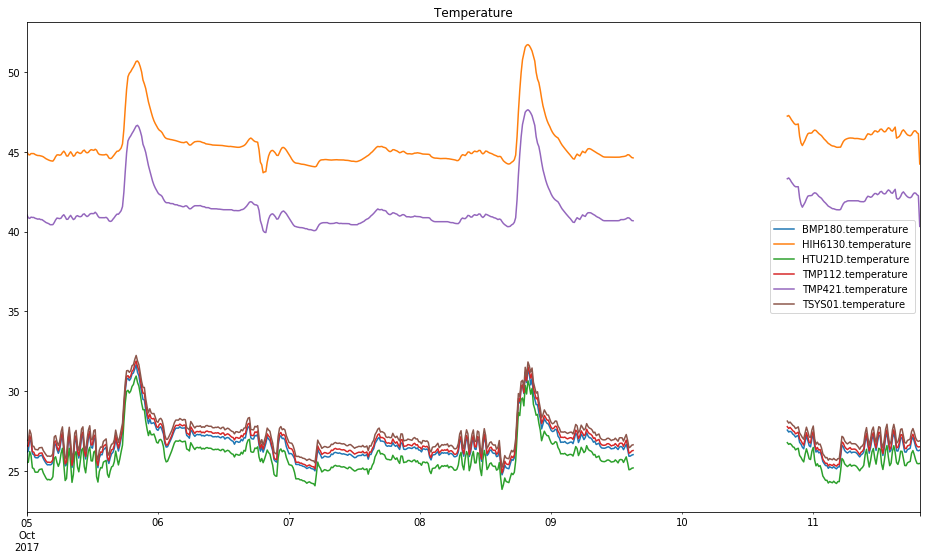

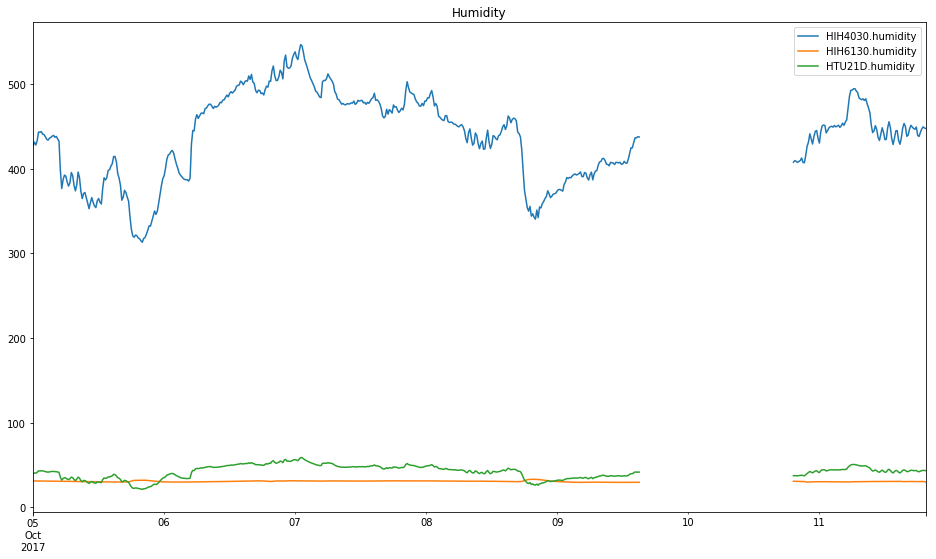

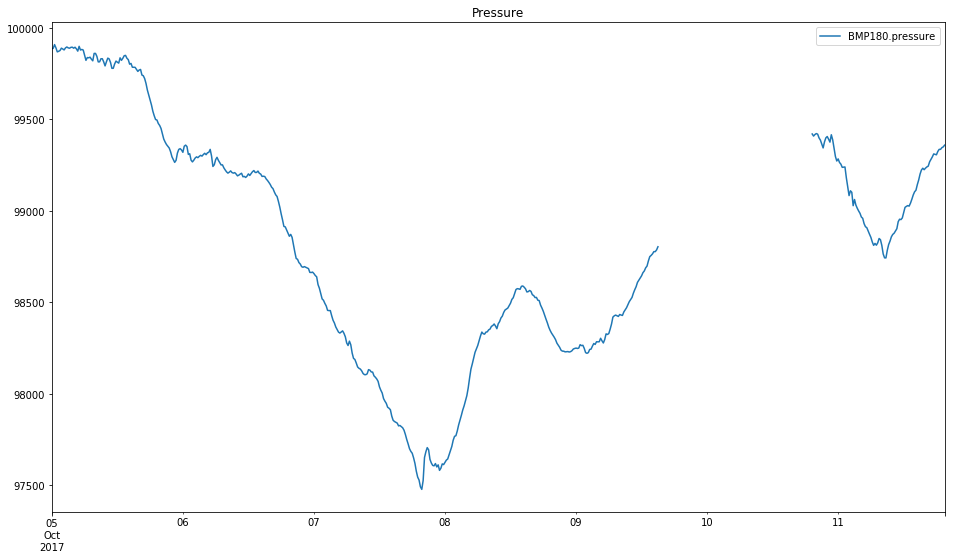

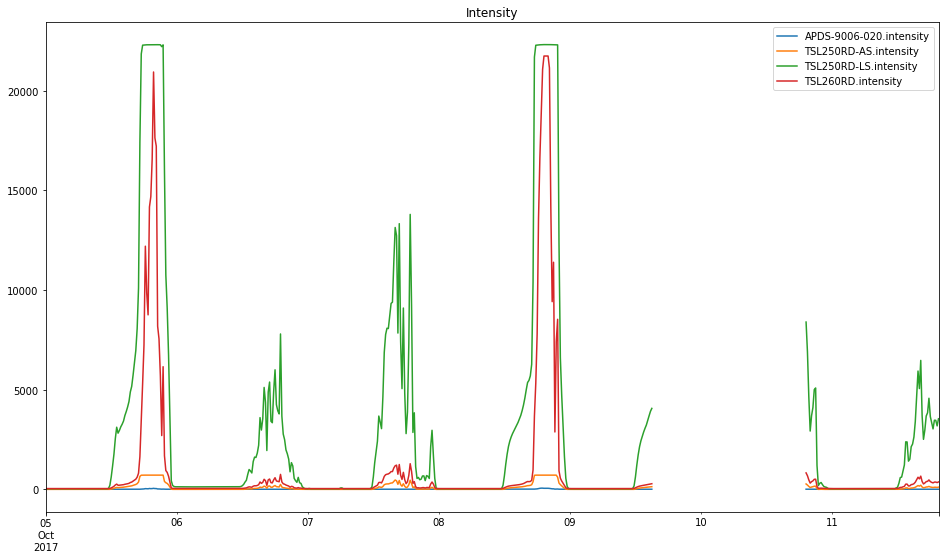

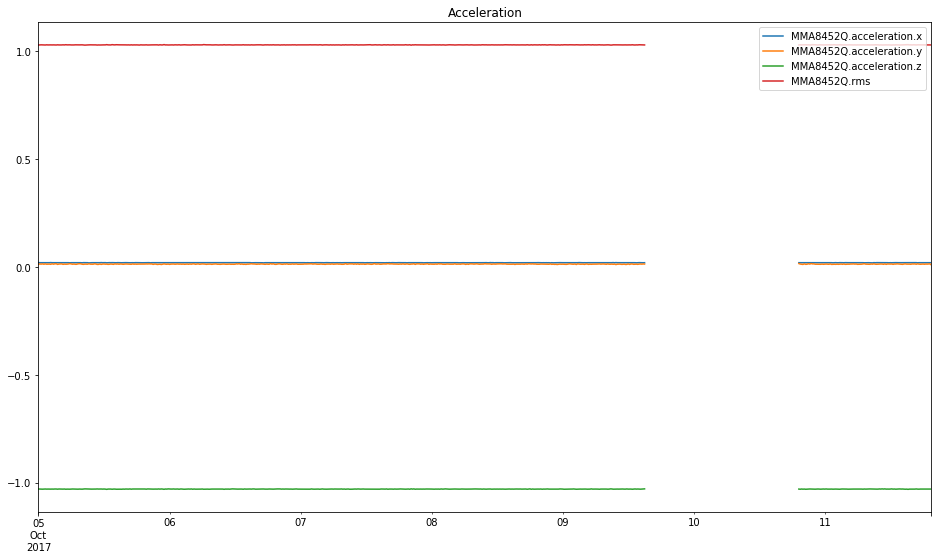

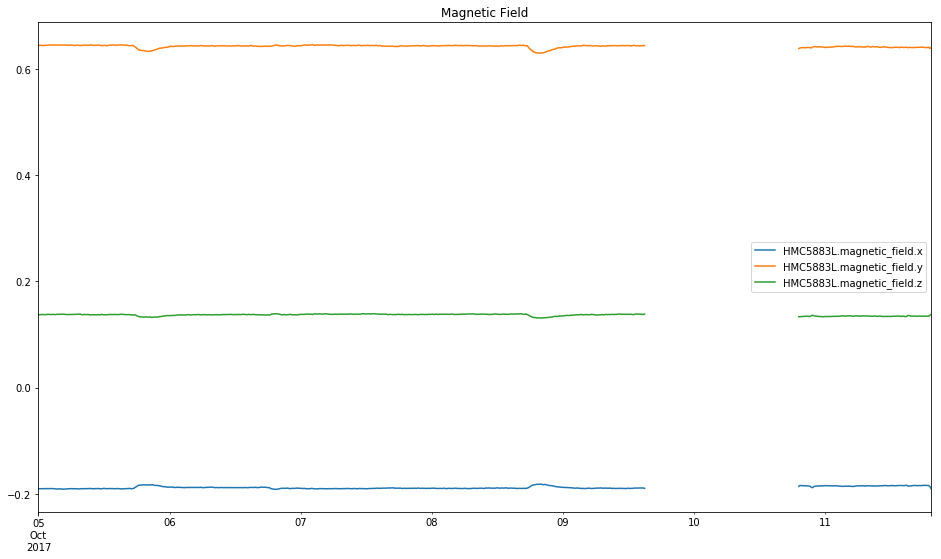

In [21]:
show_plots(df.resample('15Min').mean())